In [65]:
#import libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly.express as px
import plotly.graph_objects as go
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
import itertools


warnings.filterwarnings('ignore')


In [2]:
#set working directory
working_directory = "C:/Users/ADMIN/Documents/Agriculture Project"
os.chdir = working_directory

In [3]:
df = pd.read_csv("C:/Users/ADMIN/Documents/Agriculture Project/Crop_recommendation.csv")
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
#data description
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [6]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(df['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(df['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(df['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(df['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


In [7]:
#size of data
df.shape

(2200, 8)

In [8]:
#number of crops
df['label'].nunique()

22

In [9]:
#type of crops
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
#number of each crop
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

VISUALIZATION


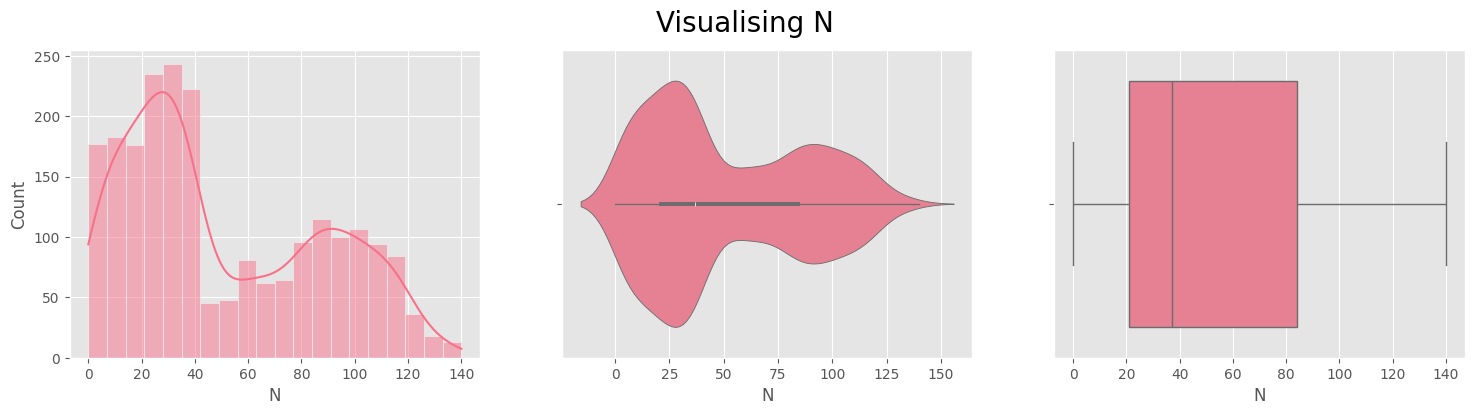

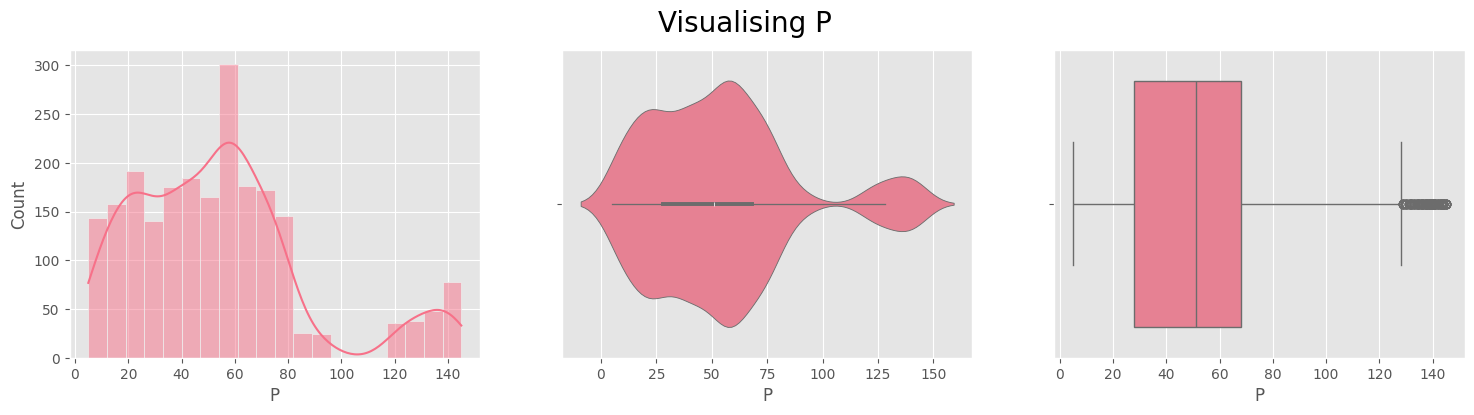

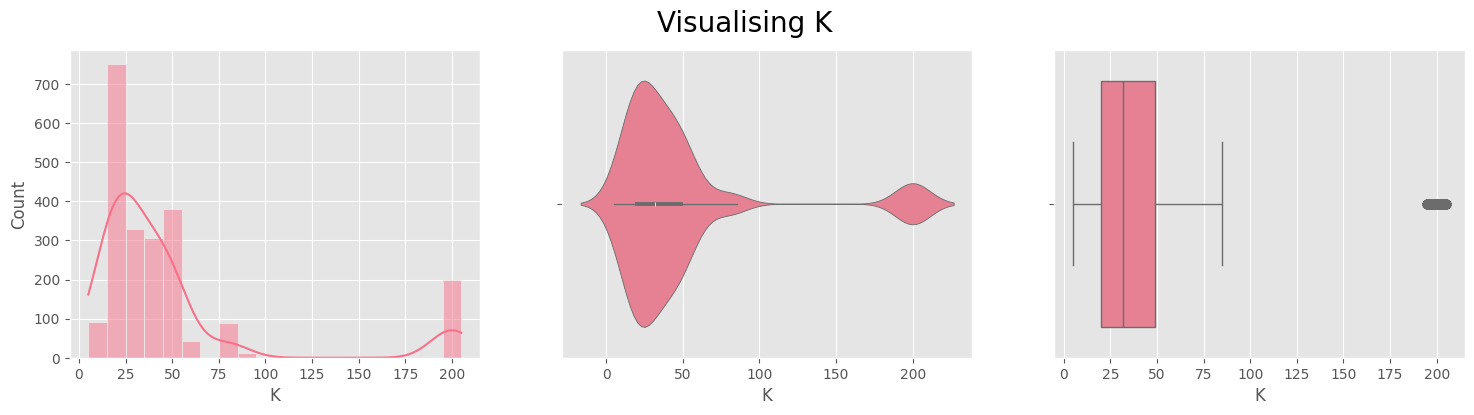

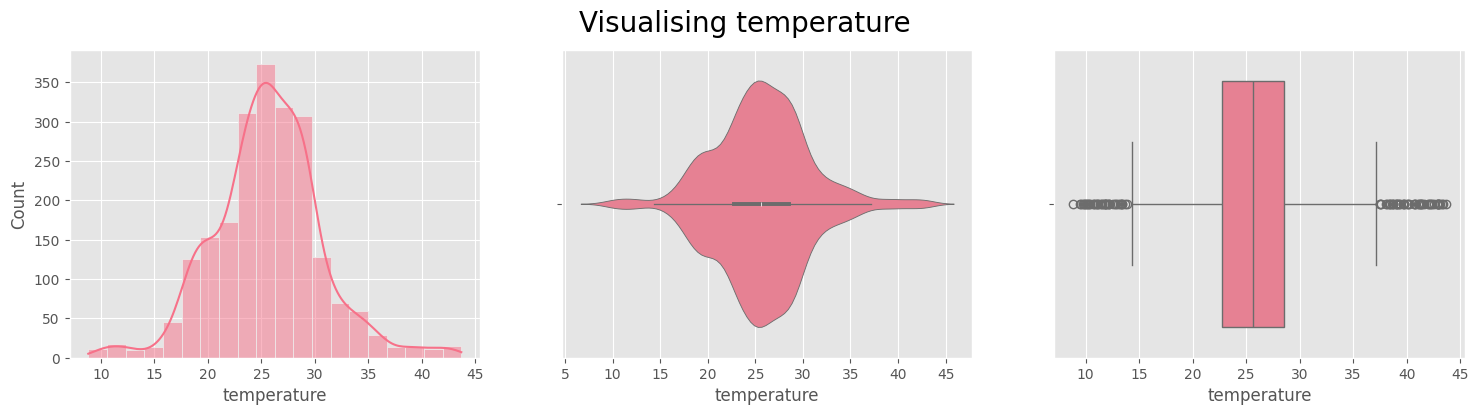

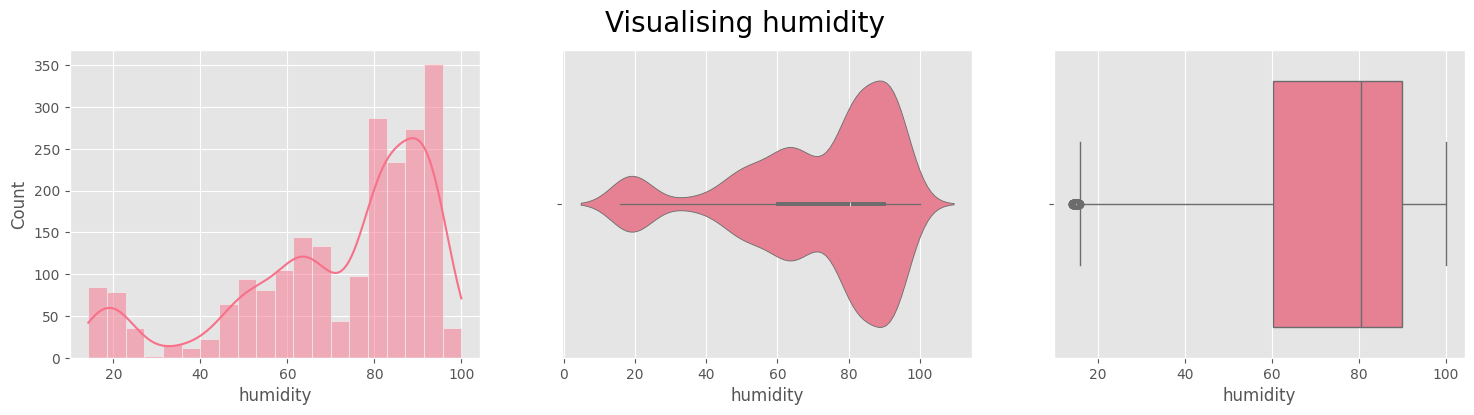

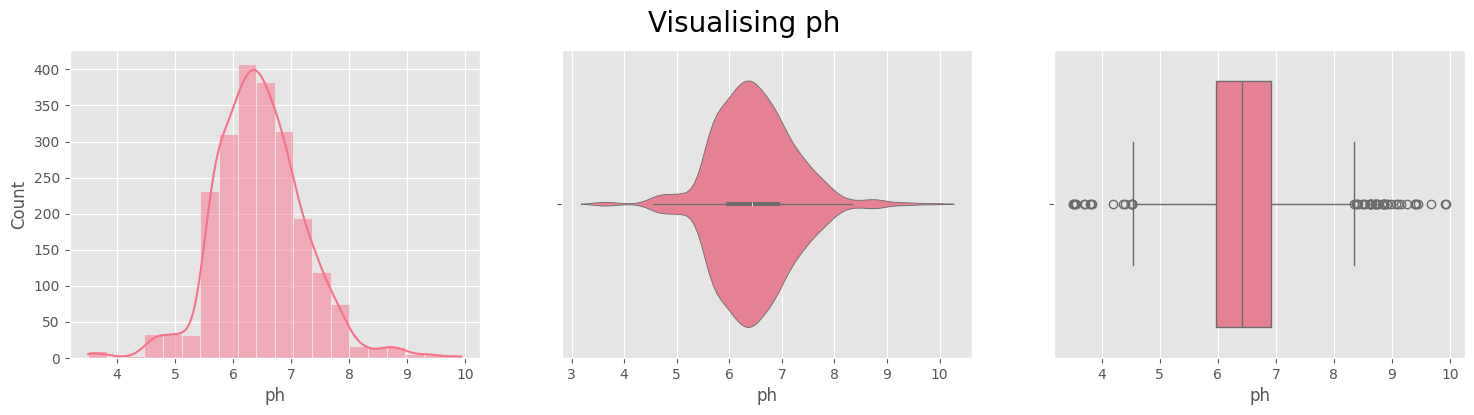

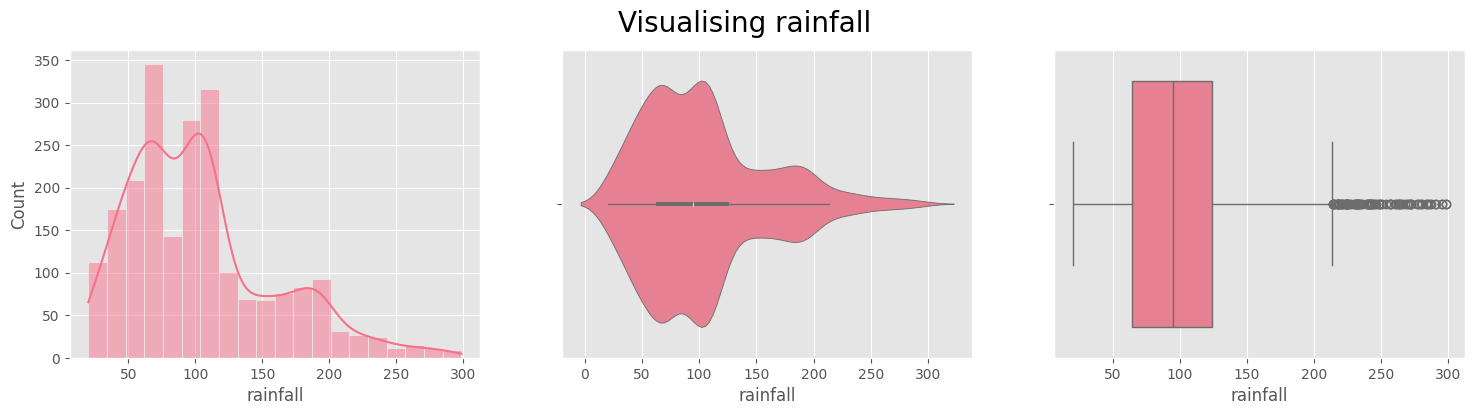

In [11]:
#distribution of crops
plt.style.use('ggplot')
sns.set_palette("husl")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20, ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualising {i}',size=20)

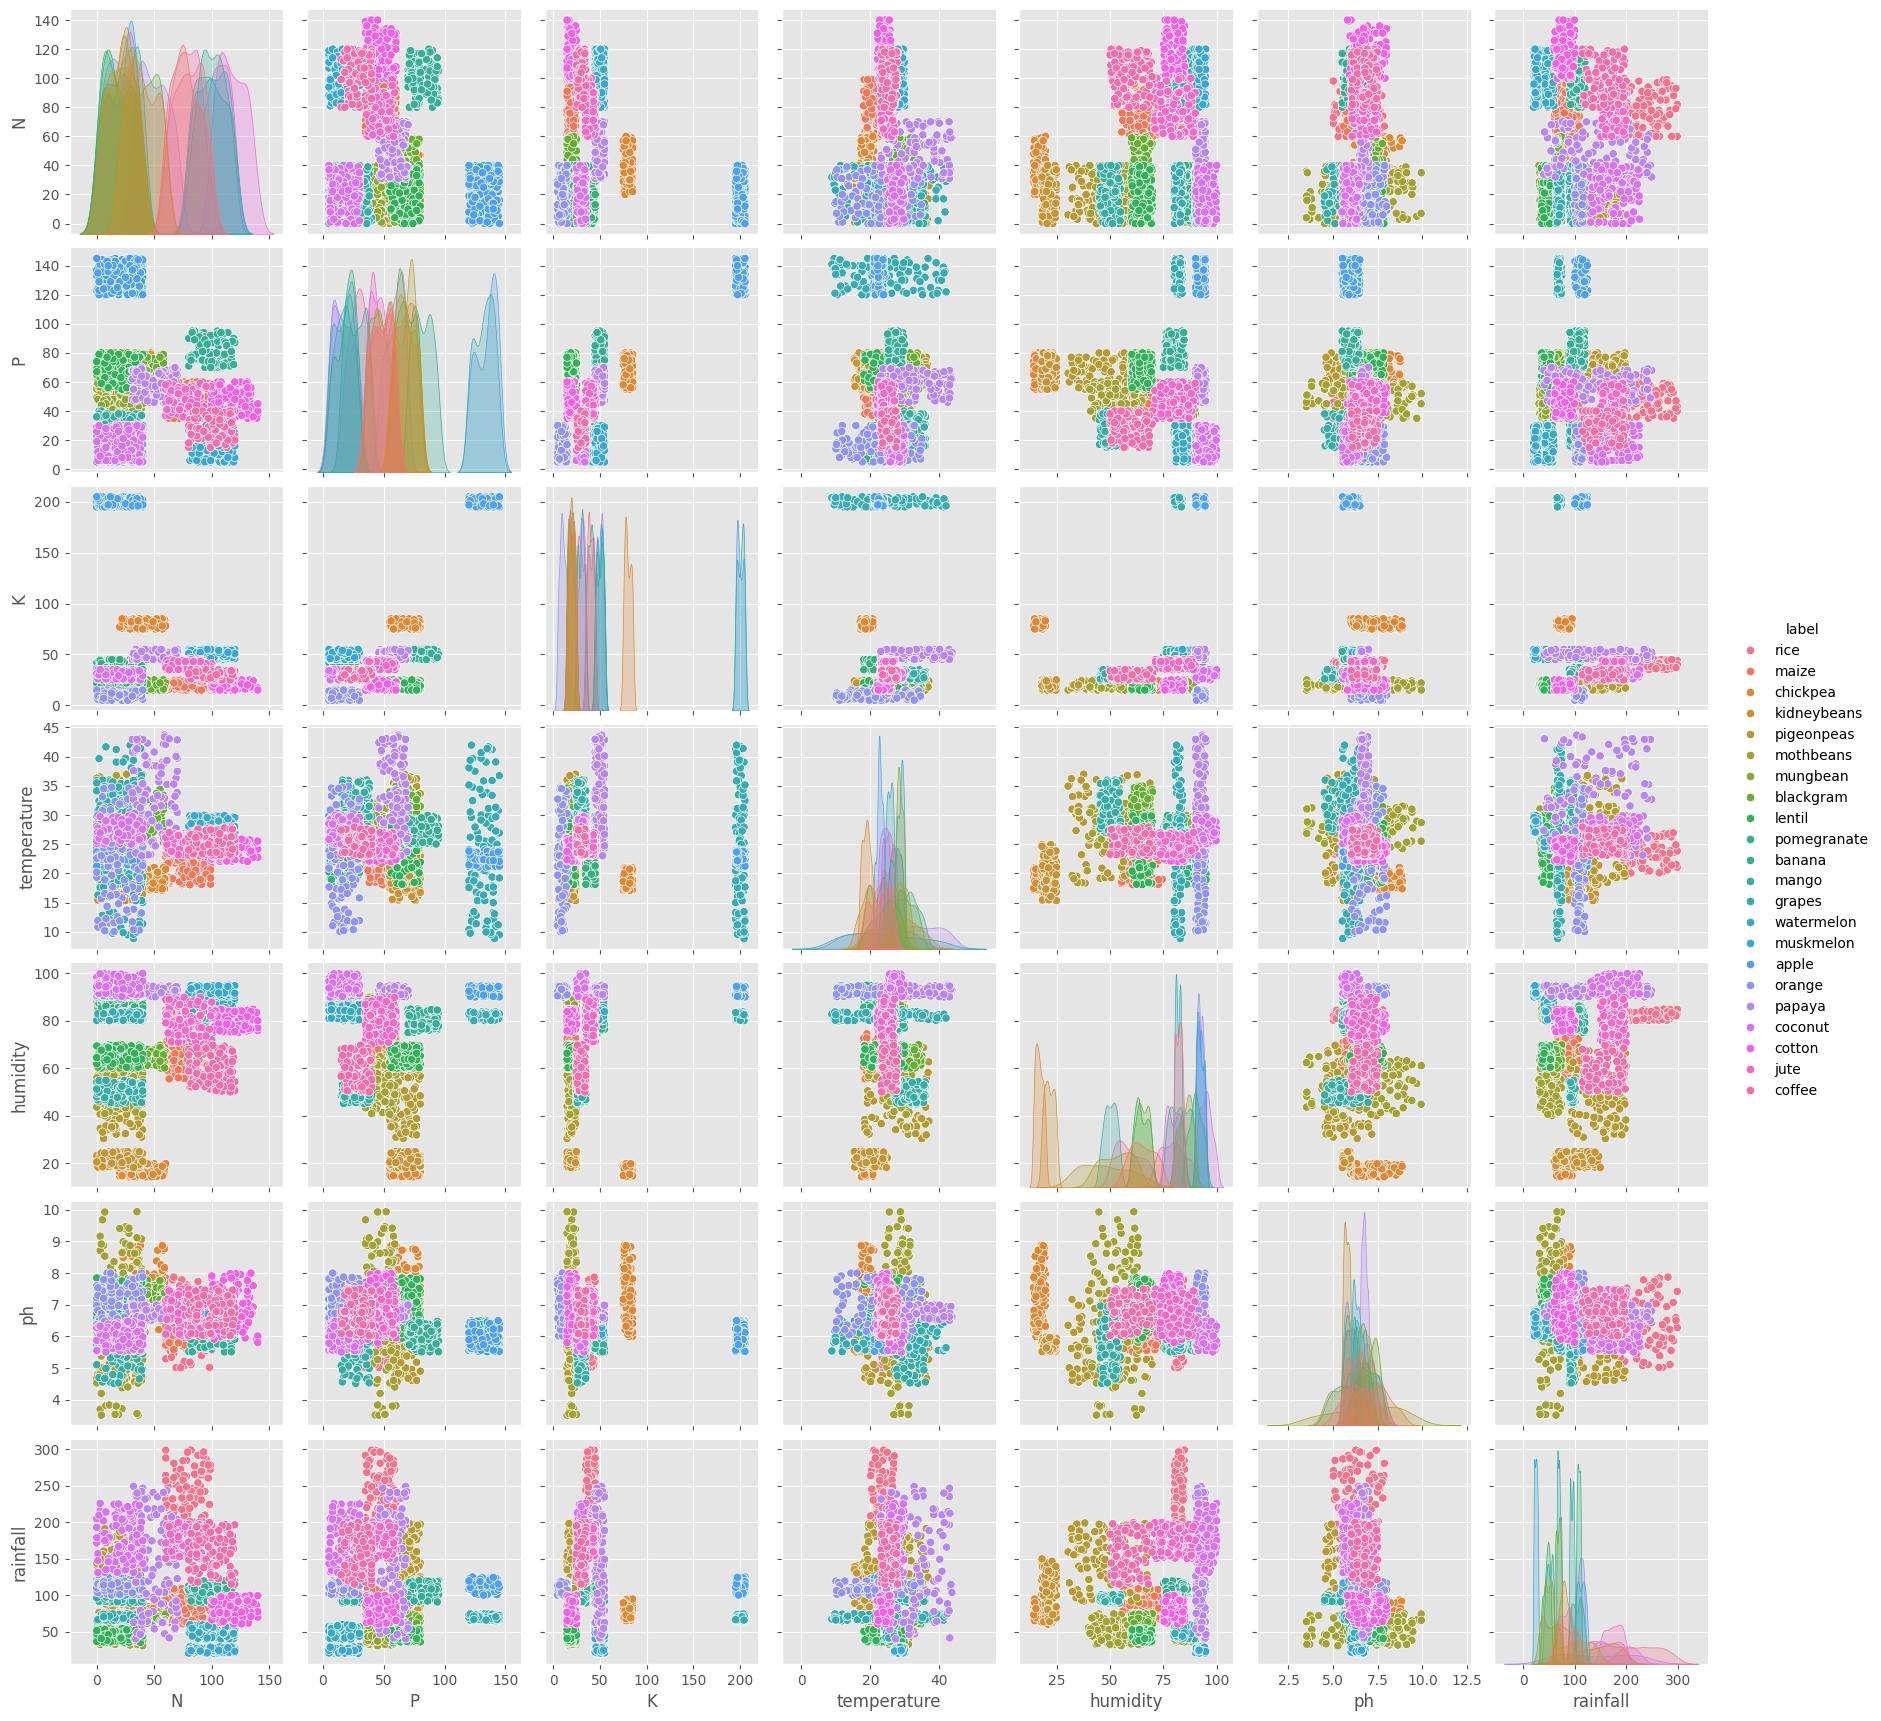

In [12]:
sns.pairplot(df,hue = 'label')

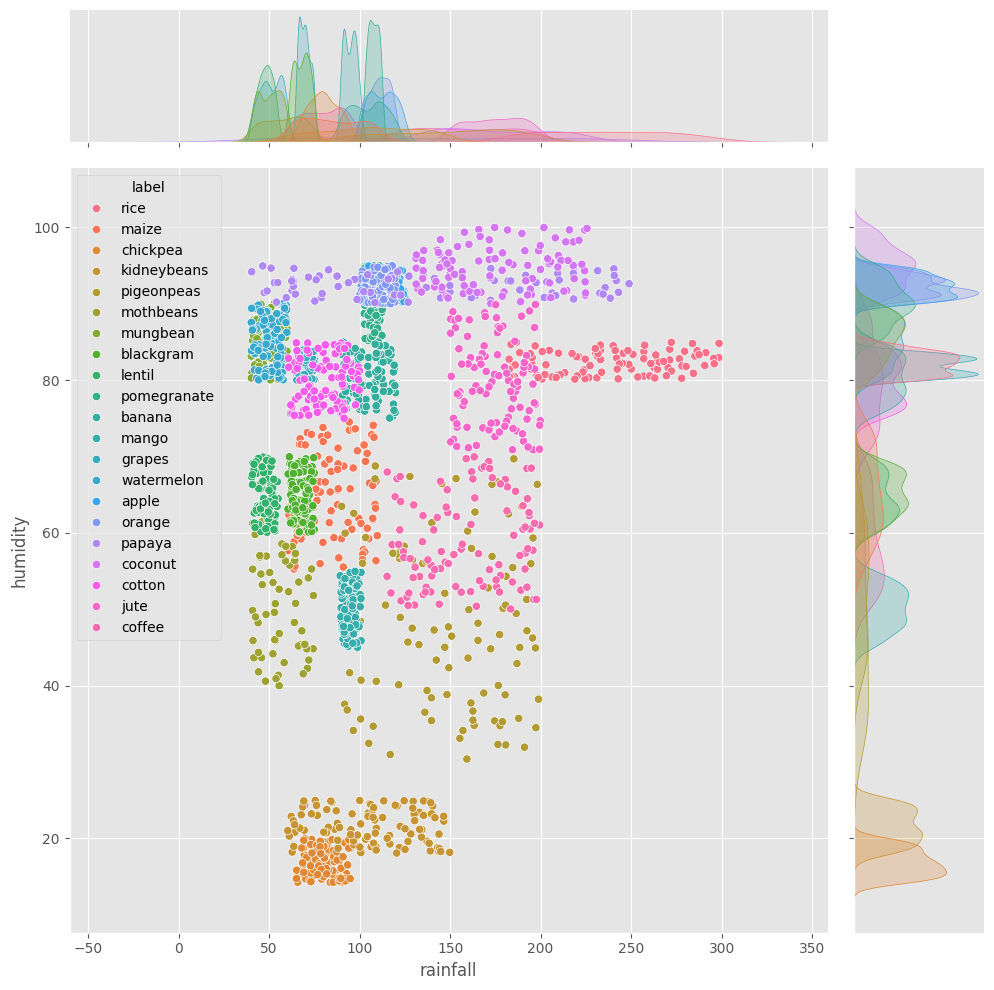

In [13]:
# In general, when precipitation increases, it increases with the degree of humidity
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<40) & 
                                                  (df['rainfall']>40)],height=10,hue="label")

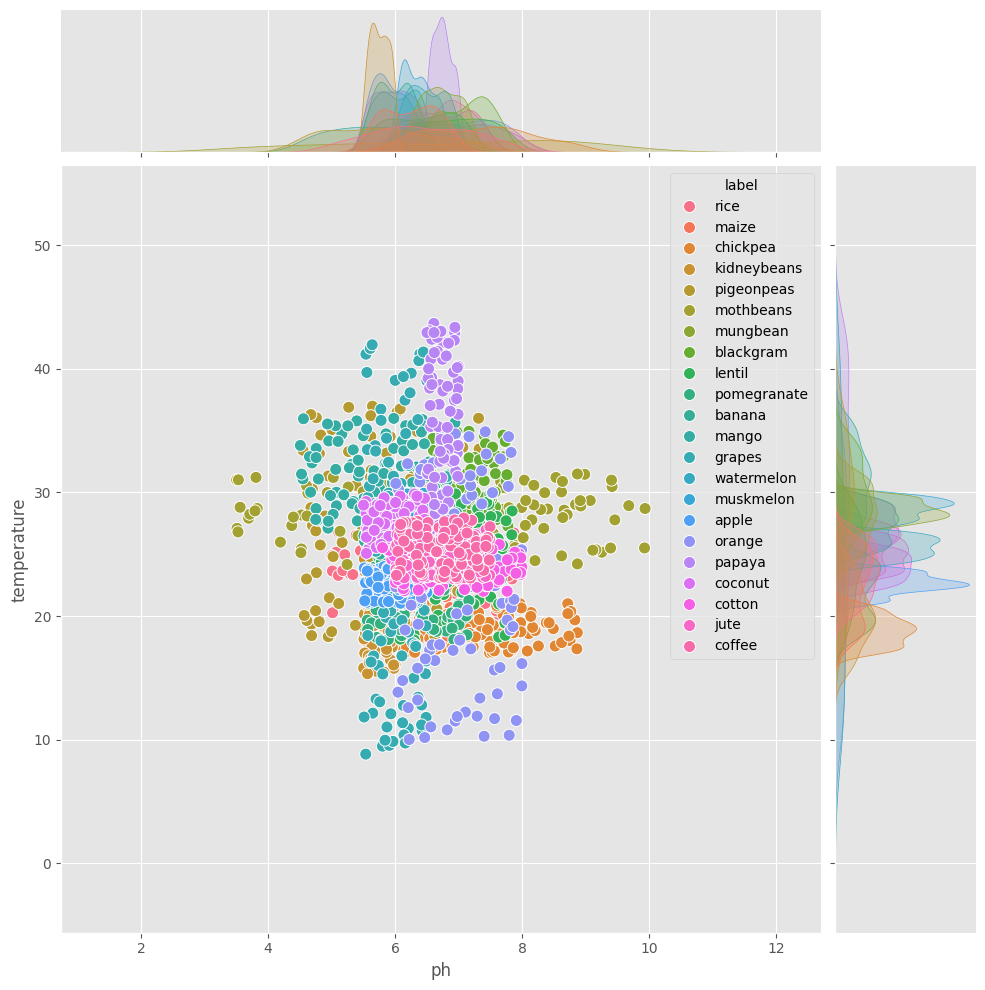

In [14]:
# In general, when the temperature rises above 21 pH decrease 
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
sns.jointplot(data=df, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

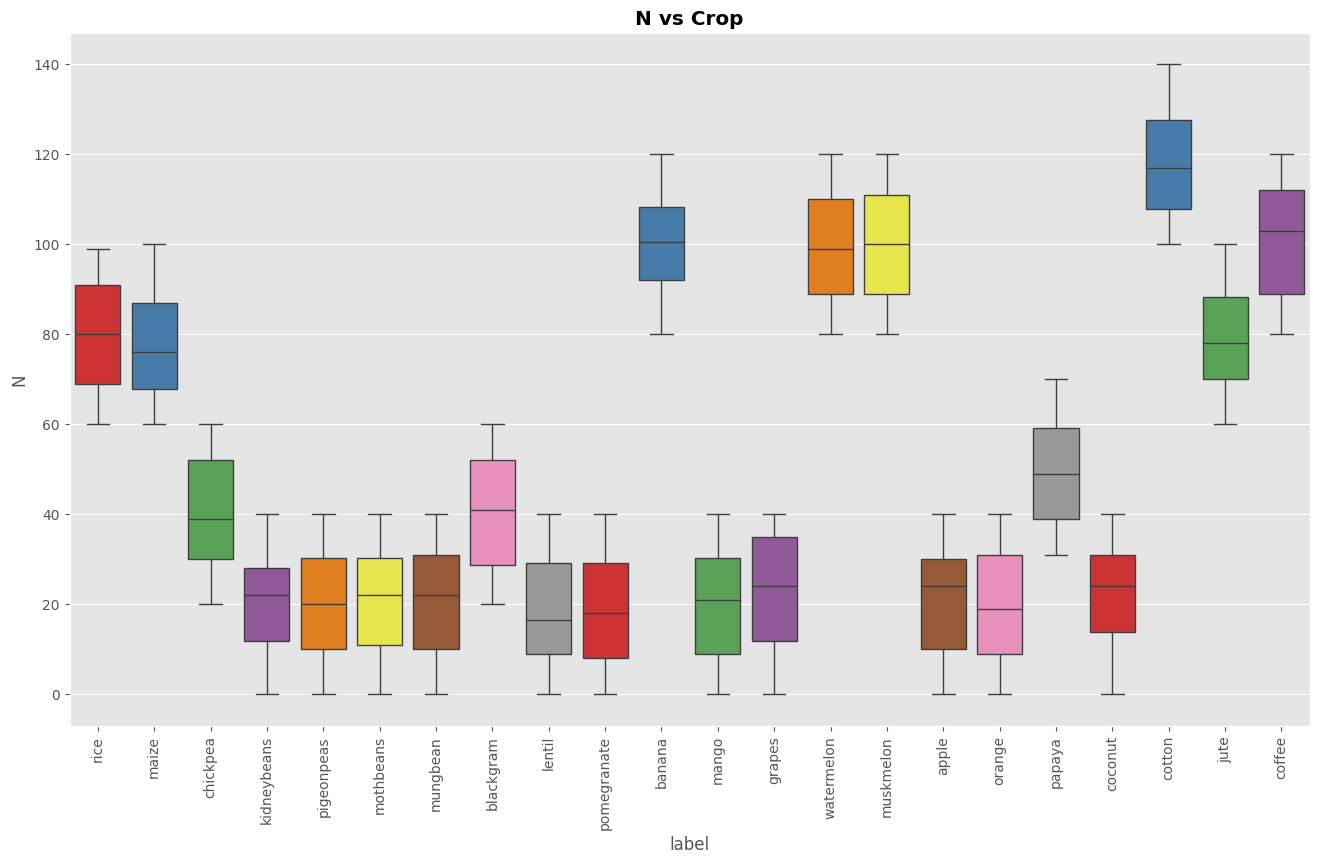

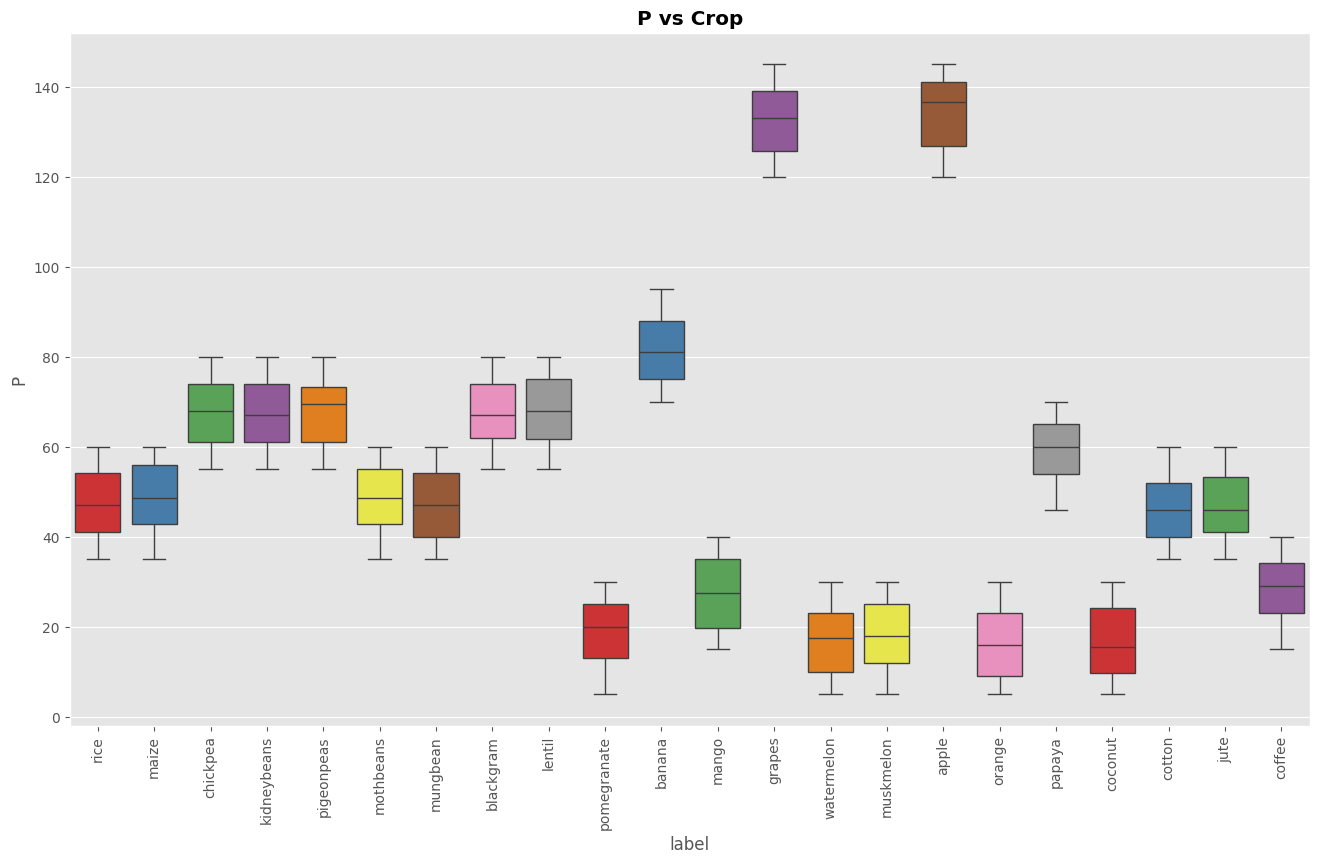

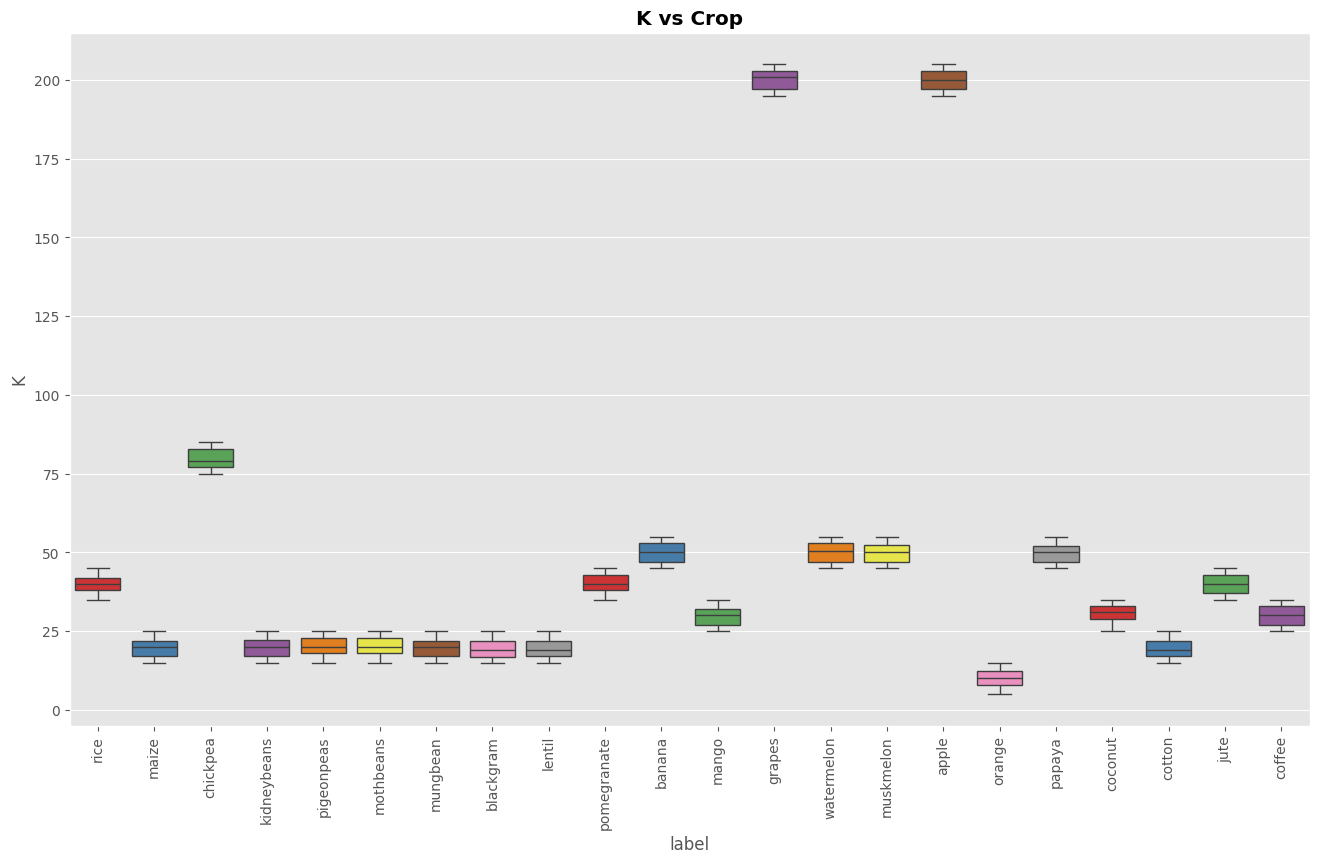

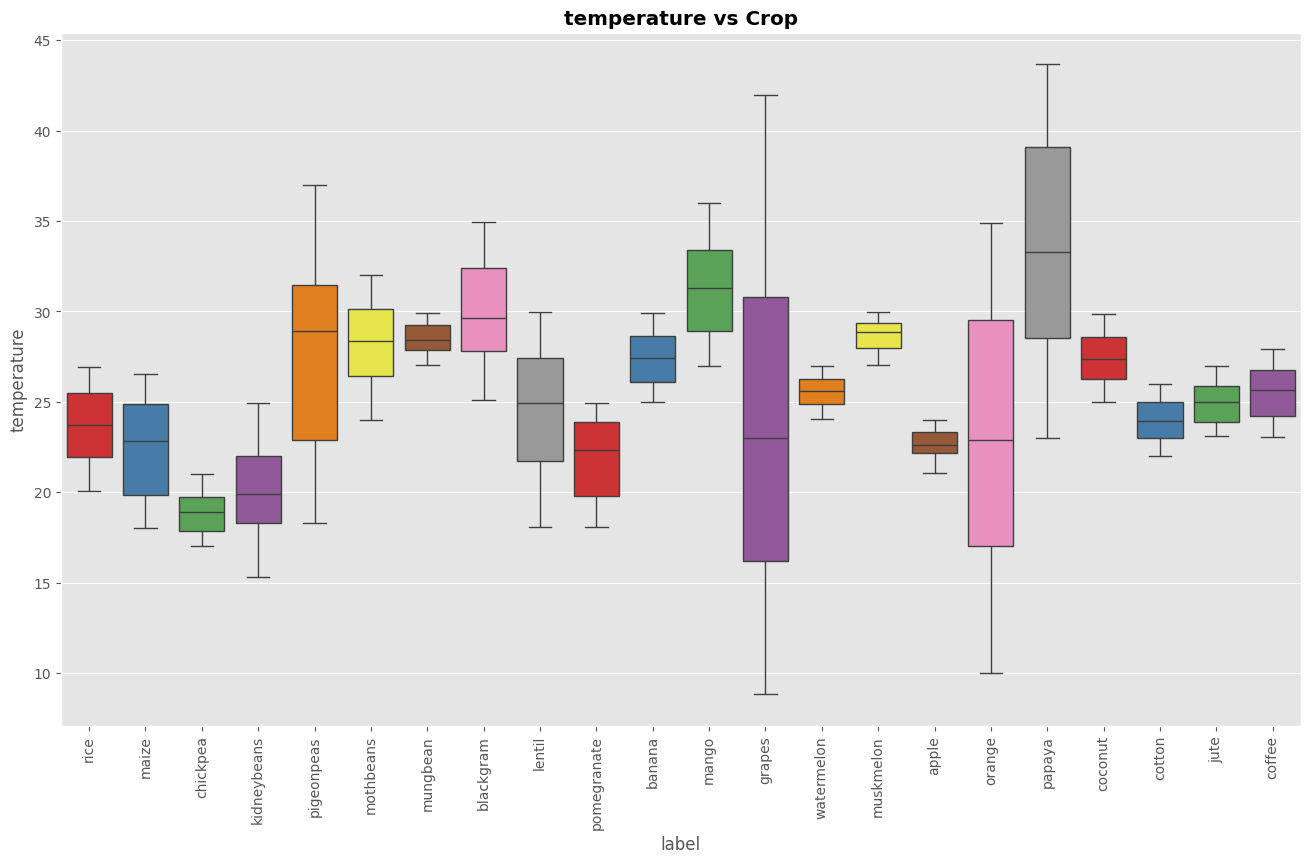

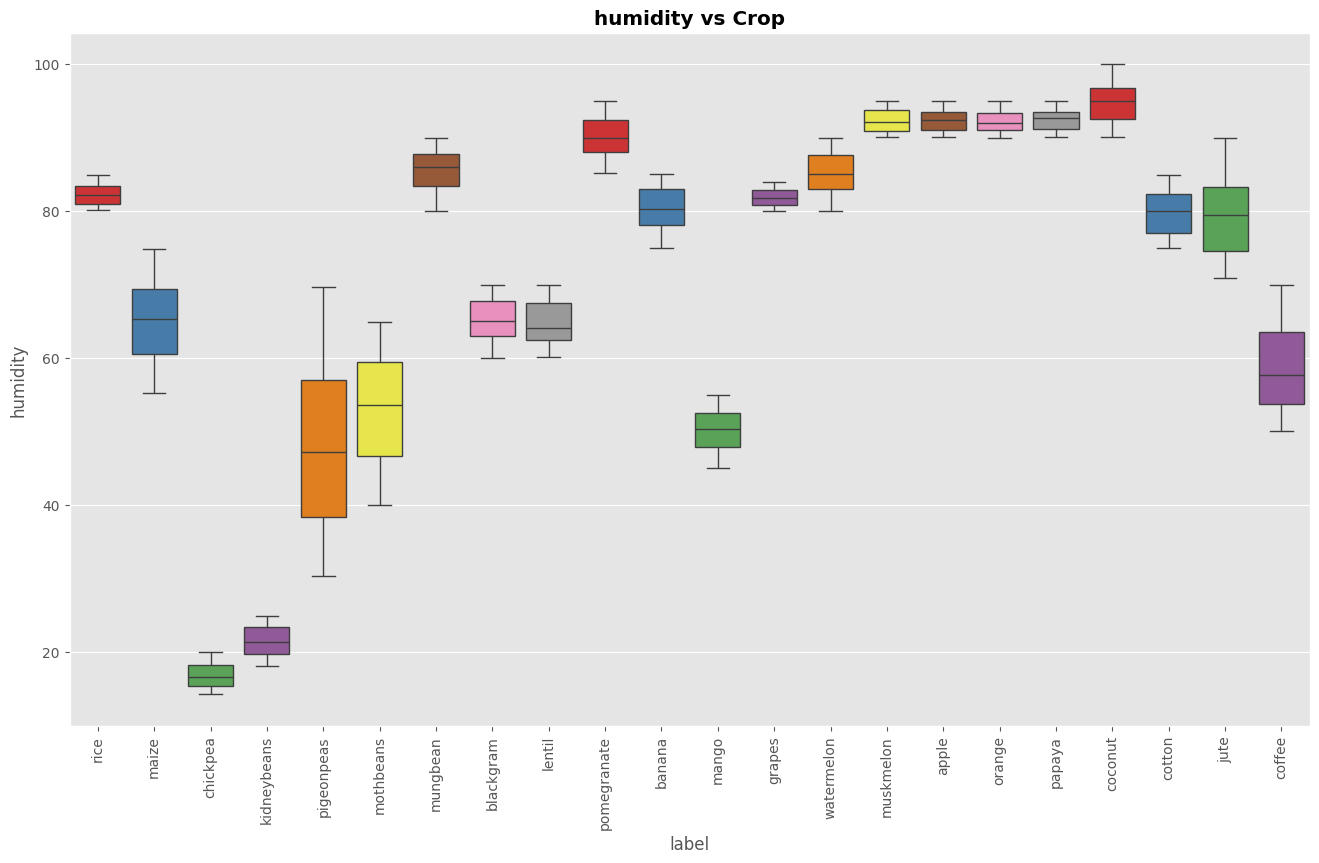

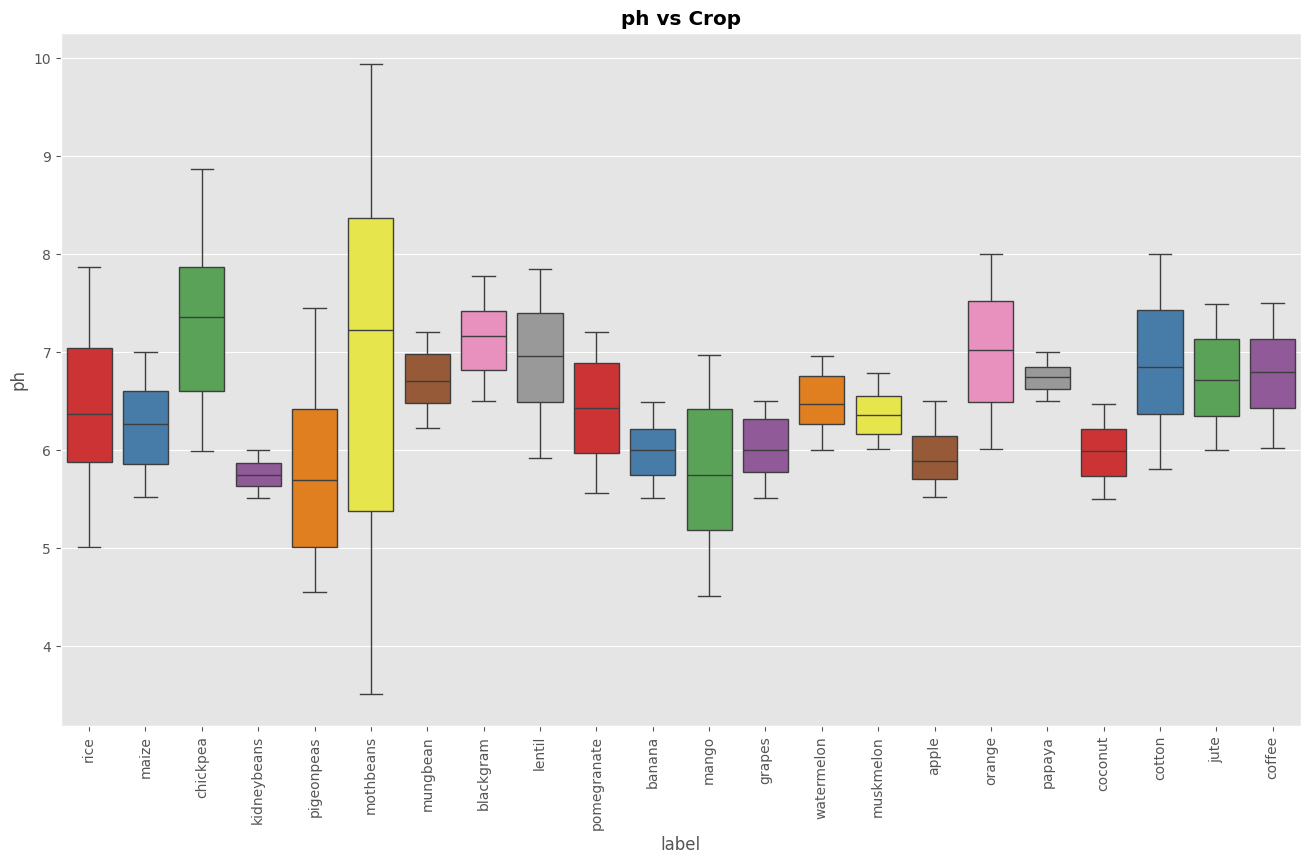

In [15]:
#box plot of features against crop
all_col = df.columns[:-2]

for col in all_col:
  plt.figure(figsize = (16, 9))
  sns.boxplot(x = 'label', y = col, data = df, palette = 'Set1')
  plt.xlabel('label', fontsize = 12)
  plt.ylabel(col, fontsize = 12)
  plt.xticks(rotation=90)
  plt.title(f'{col} vs Crop', fontweight='bold')
  plt.show()

In [16]:
# lets compare the average requirement for each crops with average conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average value for", conditions, "is {0:.2f}".format(df[conditions].mean()))
    print("------------------------------------------------------------------------------")
    print("Rice: {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
    print("Banana: {0:.2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
    print("Jute: {0:.2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
    print("Coconut: {0:.2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
    print("Apple: {0:.2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
    print("Papaya: {0:.2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon: {0:.2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes: {0:.2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
    print("Watermelon: {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans: {0:.2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))
    print("Oranges: {0:.2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
    print("Chick Peas: {0:.2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))
    print("Lentils: {0:.2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
    print("Cotton: {0:.2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
    print("Maize: {0:.2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans: {0:.2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas: {0:.2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango: {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print("Pomegranate: {0:.2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee: {0:.2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [17]:
# lets make this function more intuitive

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("-----------------------------------------------------------------------------")
    print("Crops which require less than or equal to average", conditions, '\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [18]:
#mean of different crops
df_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary.head()

K       N       P   humidity        ph    rainfall  \
label                                                                
apple      199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana      50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram   19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea    79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut     30.59   21.98   16.93  94.844272  5.976562  175.686646   

           temperature  
label                   
apple        22.630942  
banana       27.376798  
blackgram    29.973340  
chickpea     18.872847  
coconut      27.409892

In [19]:
#N-P-K values comparison between crops
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [20]:
numeric_df = df.select_dtypes(include=['number'])


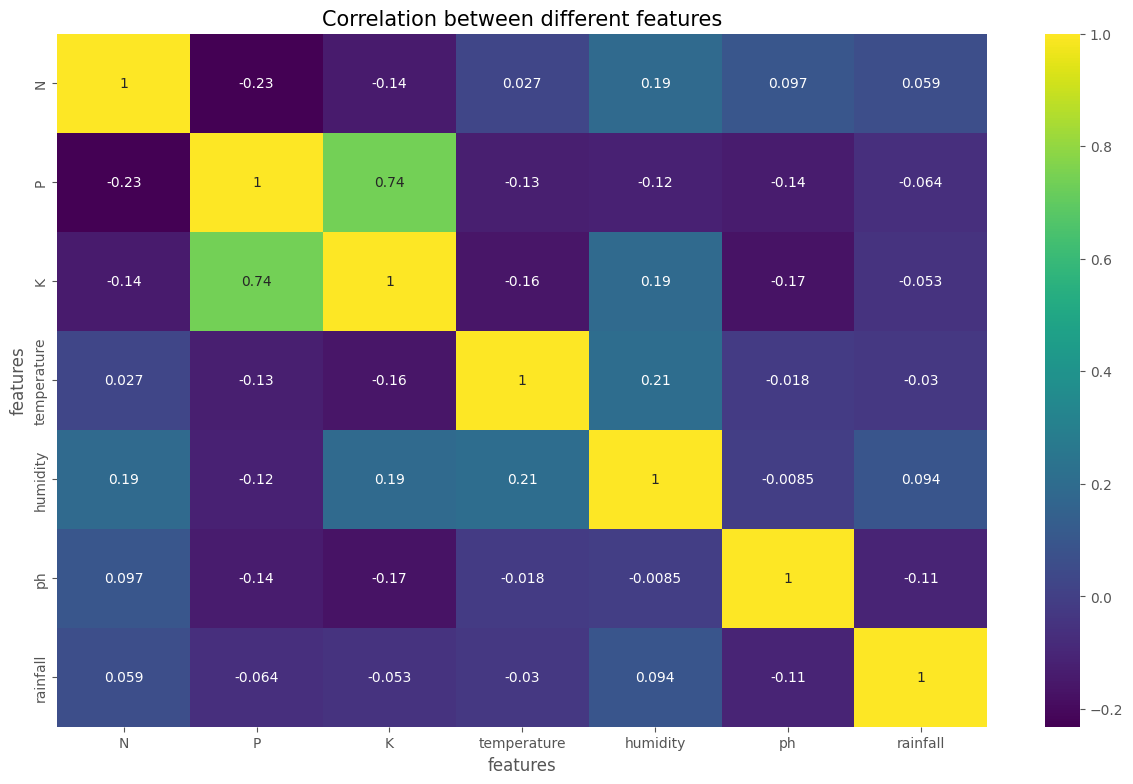

In [21]:
#correlation between features
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_df.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [22]:
#crop feature distribution
df2 = df.copy()

dfg = pd.DataFrame({'label':df2['label'].unique()})
dfg['dummy'] = dfg.index
df2 = pd.merge(df2, dfg, on = 'label', how='left')

dimensions = list([dict(range=[0,df2['dummy'].max()], tickvals = dfg['dummy'], ticktext = dfg['label'], label='Crops', values=df2['dummy']),
                   dict(range=[df2['N'].min(), df2['N'].max()], label='N', values=df2['N']),
                   dict(range=[df2['P'].min(), df2['P'].max()], label='P', values=df2['P']),
                   dict(range=[df2['K'].min(), df2['K'].max()], label='K', values=df2['K']),
                   dict(range=[df2['temperature'].min(), df2['temperature'].max()], label='Temperature', values=df2['temperature']),
                   dict(range=[df2['humidity'].min(), df2['humidity'].max()], label='Humidity', values=df2['humidity']),
                   dict(range=[df2['ph'].min(),df2['ph'].max()], label='pH', values=df2['ph']),
                   dict(range=[df2['rainfall'].min(),df2['rainfall'].max()], label='Rainfall', values=df2['rainfall'])])

fig = go.Figure(data=go.Parcoords(line = dict(color = df2['dummy'], colorscale = 'magma'), dimensions=dimensions))
fig.update_layout(height = 550, width = 1000, title='Crop Feature Distribution', title_font_size=20, title_x=0.5, title_y=0.95)
fig.show()

In [23]:
#lets find out some interesting facts

print("Some Interesting Patterns")
print("------------------------------------------------------------------------------")
print("Crops which requires very high ratio of Nitrogen in soil:", df[df['N'] > 120]['label'].unique())
print("Crops which requires very high ratio of Phosphorous in soil:", df[df['P'] > 100]['label'].unique())
print("Crops which requires very high ratio of Potassium in soil:", df[df['K'] > 200]['label'].unique())
print("Crops which requires very high Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very low Temperature:", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very high Temperature:", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very high pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
------------------------------------------------------------------------------
Crops which requires very high ratio of Nitrogen in soil: ['cotton']
Crops which requires very high ratio of Phosphorous in soil: ['grapes' 'apple']
Crops which requires very high ratio of Potassium in soil: ['grapes' 'apple']
Crops which requires very high Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very low Temperature: ['grapes']
Crops which requires very high Temperature: ['grapes' 'papaya']
Crops which requires very low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very low pH: ['mothbeans']
Crops which requires very high pH: ['mothbeans']


In [24]:
#crop grouping
print("Summer Crops")
print(df[(df['temperature'] > 30) & (
    df['humidity'] > 50)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (
    df['humidity'] > 30)]['label'].unique())
print("------------------------------------------------------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (
    df['humidity'] > 50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [25]:

# removing the labels column

x = df.drop(['label'], axis = 1)

# selecting all the values of the data

x = x.values

# checking the shape

print(x.shape)

(2200, 7)


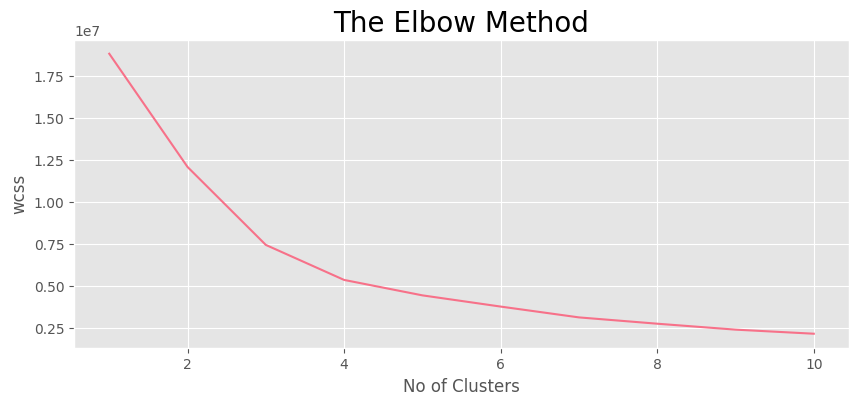

In [26]:
#determining optimum number of clusters within the dataset - group of crops using same conditions

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
# lets implement the KMeans algorithm to perform clustering analysis - group of crops using same conditions

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the results

a = df['label']
y_means = pd.DataFrame(y_means) 
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the clusters of each crops

print("Lets check the results after applying the KMeans clustering analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2]['label'].unique())
print("------------------------------------------------------------------------------")
print("Crops in Fourth cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the results after applying the KMeans clustering analysis 

Crops in First cluster: ['grapes' 'apple']
------------------------------------------------------------------------------
Crops in Second cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------------------
Crops in Third cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------------------
Crops in Fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


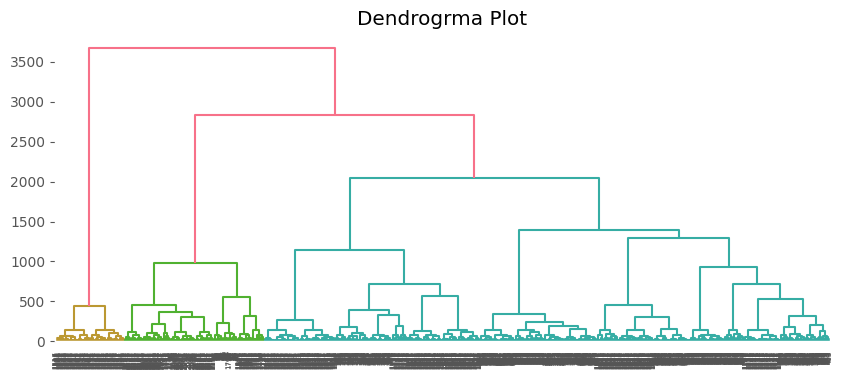

In [28]:
#dendrogrma plot
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.show() 

In [29]:
#training the hierarchical model on dataset  
hc= AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')  
y_her= hc.fit_predict(x)  

# lets find out the Results
b = df['label']
y_herr = pd.DataFrame(y_her)
w = pd.concat([y_herr, b], axis = 1)
w= w.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Hierachical Clustering Analysis \n")
print("Crops in Zero Cluster:", w[w['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in First Cluster:", w[w['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", w[w['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", w[w['cluster'] == 3]['label'].unique())

Hierachical Clustering Analysis 

Crops in Zero Cluster: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'orange' 'coconut']
---------------------------------------------------------------
Crops in First Cluster: ['maize' 'blackgram' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton']
---------------------------------------------------------------
Crops in Second Cluster: ['rice' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']


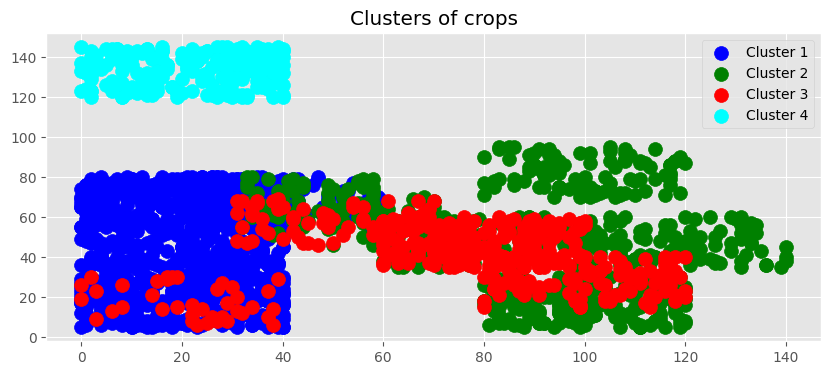

In [30]:
#visulaizing the clusters  
plt.scatter(x[y_her == 0, 0], x[y_her == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_her == 1, 0], x[y_her == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_her== 2, 0], x[y_her == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_her == 3, 0], x[y_her == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.title('Clusters of crops')  
plt.legend()  
plt.show()

In [31]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

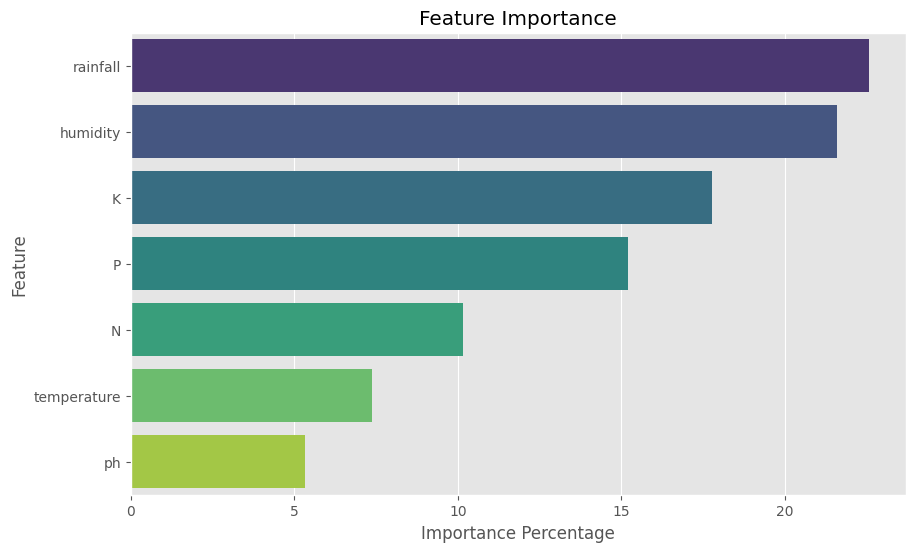

In [32]:

# Split the data into features and target variable
X = df.drop(columns=["label"])  # Features
y =df["label"]

target_column = 'label'
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Assuming X and y are your training features and labels
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Calculate importance percentage
total_importance = feature_importance_df['Importance'].sum()
feature_importance_df['Importance_percentage'] = (feature_importance_df['Importance'] / total_importance) * 100

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance_percentage', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.show()


In [39]:
# Encoding the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [44]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3,
                                shuffle = True, random_state = 42,stratify=y)


In [45]:
#feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scaler.transform(X_test)
X_train.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.335936  0.417499 -0.535091     0.378274 -0.489416  0.105457 -1.006138
1  1.797538  0.874355 -0.061709    -0.056432  0.352421 -1.102431  0.037615
2 -1.308923  0.234757 -0.554816    -0.672000 -2.173304 -0.662710 -0.486121
3 -0.282441  0.752527 -0.554816    -1.248506 -2.271540 -1.031842 -0.422218
4 -1.173860 -1.013983 -0.712610    -1.765899  1.047107  0.007107  0.121738

hyperameter tuning

In [46]:
 
# Model names
model_names = [
    'svm', 'random_forest', 'logistic_regression', 'gradient_boosting', 
    'gaussian_nb', 'knn', 'decision_tree', 'adaboost', 'xgboost'
]

# Initialize classifiers
svm = SVC()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression(solver='liblinear', multi_class='auto')
gradient_boosting = GradientBoostingClassifier()
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
adaboost = AdaBoostClassifier()
xgboost = XGBClassifier(eval_metric='logloss')

# List of classifiers
models = [
    svm, random_forest, logistic_regression, gradient_boosting, 
    gaussian_nb, knn, decision_tree, adaboost, xgboost
]

# Hyperparameter search spaces for each classifier
model_params = [
    {'C': [1, 10, 100, 0.1], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']},
    {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    {'C': [1, 5, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    {'var_smoothing': [0.4, 0.8, 1e-9]},
    {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0], 'max_depth': [3, 6, 9]}
]

In [47]:
 # Perform grid search for each classifier
for name, model, params in zip(model_names, models, model_params):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
 
for name, model, params in zip(model_names, models, model_params):
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train) 
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")

Best parameters for svm: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for svm: 0.9857142857142858
Best parameters for random_forest: {'max_depth': 20, 'n_estimators': 50}
Best cross-validation score for random_forest: 0.9954545454545455
Best parameters for logistic_regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score for logistic_regression: 0.9772727272727273
Best parameters for gradient_boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score for gradient_boosting: 0.9811688311688312
Best parameters for gaussian_nb: {'var_smoothing': 1e-09}
Best cross-validation score for gaussian_nb: 0.9948051948051948
Best parameters for knn: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for knn: 0.9694805194805195
Best parameters for decision_tree: {'criterion': 'gini', 'max_depth': None}
Best cross-validation score for decision_tree: 0.9824675324675324
Best parameters f

In [60]:

# Train the best Random Forest model with the best parameters
best_rf_params = {'max_depth': 20, 'n_estimators': 50}
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
score = accuracy_score(y_test, y_pred)

# Generate and print classification report
report = classification_report(y_test, y_pred)
print('The classification Report is:')
print(report)


The classification Report is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        

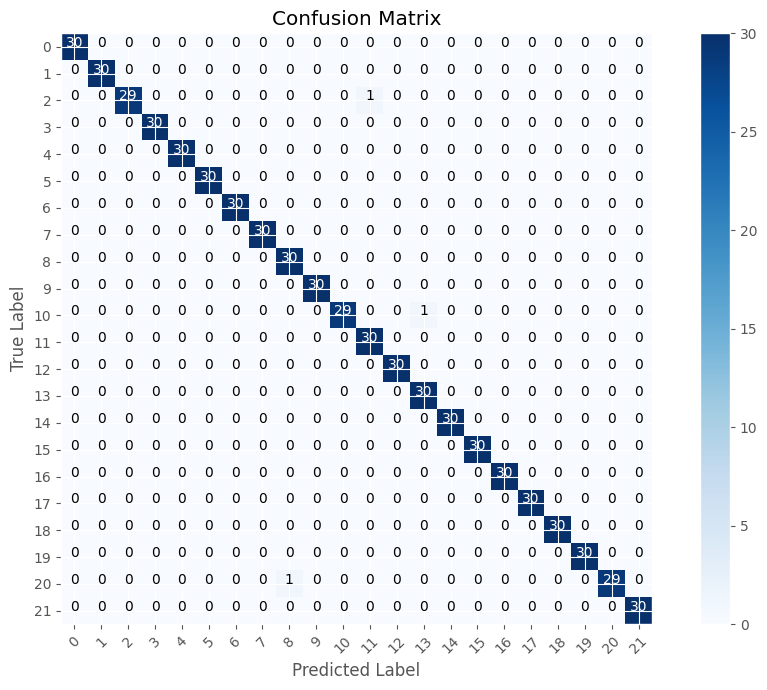

In [66]:

# Ensure your predicted and test labels are defined
y_test = np.array(y_test)
y_pred = np.array(y_pred)

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the confusion matrix values on the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
#Provides a detailed view of the classification results by showing the correct and incorrect predictions for each class.


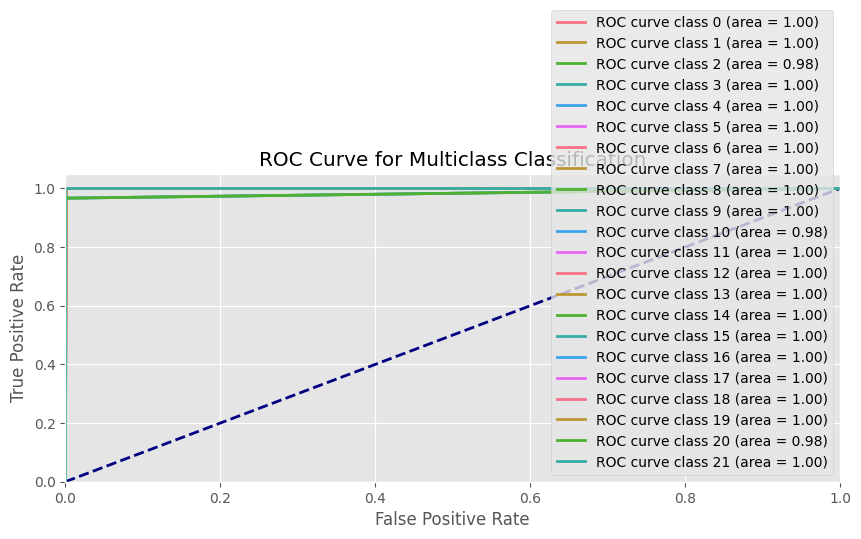

In [67]:
# Generate ROC curve and calculate AUC for multiclass classification
#Illustrates the trade-off between sensitivity and specificity for each class, providing an overall performance measure through the AUC.
if n_classes > 2:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class %d (area = %0.2f)' % (i, roc_auc[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()